# Estadistica con Python

## Librería Pandas

### Importamos las librerías que usaremos
La convención común es importar pandas como "pd"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Creamos un dataset con los datos de un electrocardiograma

La función head() nos ayuda a ver las primeras lineas del dataframe

In [4]:
ecg = pd.read_csv ("ecg.csv", header = None, low_memory=False)

ecg.head(20)


,0,1,2
0,Memory Length,1000000,NaN
1,Trigger Level,1.36000e+00,NaN
2,Source,CH2,NaN
3,Probe,1.0X,NaN
4,Vertical Units,V,NaN
5,Vertical Scale,1.00000e-01,NaN
6,Vertical Position,0.00000e+00,NaN
7,Horizontal Units,S,NaN
8,Horizontal Scale,1.00000e+00,NaN
9,Horizontal Position,0.0000000e+00,NaN


### Separamos el dataframe

In [5]:


# Dividimos el DataFrame en dos
info = ecg.iloc[:17]  # Seleccionamos las filas de información
data = ecg.iloc[17:]  # Seleccionamos las filas de datos

print(info)
print(data)


                            0              1    2
0               Memory Length        1000000  NaN
1               Trigger Level    1.36000e+00  NaN
2                      Source            CH2  NaN
3                       Probe           1.0X  NaN
4              Vertical Units              V  NaN
5              Vertical Scale    1.00000e-01  NaN
6           Vertical Position    0.00000e+00  NaN
7            Horizontal Units              S  NaN
8            Horizontal Scale    1.00000e+00  NaN
9         Horizontal Position  0.0000000e+00  NaN
10            Horizontal Mode      Roll Mode  NaN
11  Waveform Last Dot Address        1000000  NaN
12            Sampling Period    2.00000e-05  NaN
13                   Firmware          V1.12  NaN
14                       Time                    
15                       Mode           Fast  NaN
16              Waveform Data            NaN  NaN
           0    1    2
17       -38  NaN  NaN
18       -38  NaN  NaN
19       -38  NaN  NaN
20      

### Limpiamos las columnas sin información

In [7]:
# Eliminamos las columnas sin información
data.drop([1,2], axis=1, inplace=True)

data.head()

C:\Users\emma\AppData\Local\Temp\ipykernel_8988\1963417008.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop([1,2], axis=1, inplace=True)


,0
17,-38
18,-38
19,-38
20,-38
21,-38


In [9]:
# Revisamos el tipo de datos que almacena

data[0] = data[0].astype(int)

print (data.dtypes)


0    int32
dtype: object


C:\Users\emma\AppData\Local\Temp\ipykernel_8988\125717346.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[0] = data[0].astype(int)


### Graficamos la señal para ver la señal completa

(7.5, 15.0)

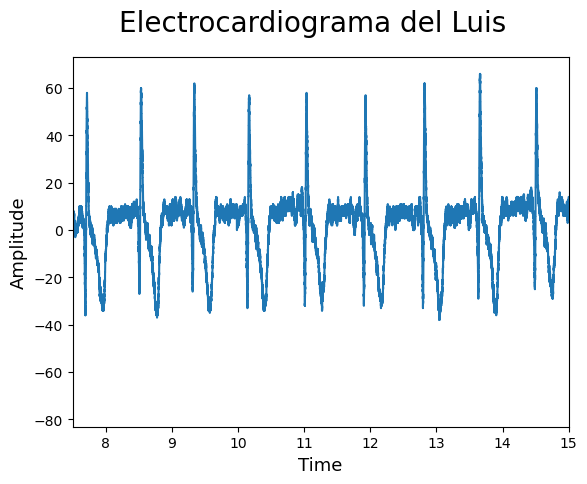

In [11]:
#Le damos fomrato para poder graficar
signal = np.ravel(data.to_numpy())

p = 0.00002 # Sampling period
time = np.arange(len(signal))*p   #Tiempo de la señal

plt.plot(time,signal)
plt.suptitle('Electrocardiograma del Luis', fontsize = 20)
plt.xlabel ("Time", fontsize = 13)
plt.ylabel ("Amplitude", fontsize = 13)
plt.xlim(7.5,15)

## Calculamos algunas variables estadisticas

In [12]:
data.describe() #Descripción básica del dataframe

,0
count,1000000.000000
mean,-7.659693
std,20.400998
min,-76.000000
25%,-24.000000
50%,-2.000000
75%,7.000000
max,66.000000


In [16]:
promedio = data.mean()[0]
mediana = data.median ()[0]
moda = data[0].mode()[0]

print(promedio)
print (mediana)
print(moda)


-7.659693
-2.0
6


In [17]:
desviacion_estandar = data.std()[0]
varianza = data.var()[0]

print (desviacion_estandar)
print(varianza)

20.400997876287384
416.20071434828236


In [18]:
suma = data.sum ()[0]

print (suma)

-7659693


In [19]:
minimo = data.min ()[0]
maximo = data.max ()[0]

print(minimo)
print(maximo)

-76
66


In [20]:
asimetria = data.skew()[0]
curtosis = data.kurt()[0]

print (asimetria)
print (curtosis)

-0.33987843321133393
0.5663182635149262


In [21]:
cuartil_1 = data.quantile(0.25)[0]
cuartil_2 = data.quantile(0.5)[0]
cuartil_3 = data.quantile(0.75)[0]

print (cuartil_1)
print (cuartil_2)
print (cuartil_3)


-24.0
-2.0
7.0


### Podemos guardar todas las variables estadísticas para usarlas en otros procesos

In [22]:
data_instance = {'Promedio': [],
                 'Mediana': [],
                 'Moda': [],
                 'Desviación estandar': [],
                 'Varianza': [],
                 'Suma': [],
                 'Mínimo': [],
                 'Máximo': [],
                 'Asimetria': [],
                 'Curtosis': [],
                 'Cuartil 1': [],
                 'Cuartil 2': [],
                 'Cuartil 3': []}

In [24]:
data_instance ['Promedio'].append(promedio)
data_instance ['Mediana'].append(mediana)
data_instance ['Moda'].append(moda)
data_instance ['Desviación estandar'].append(desviacion_estandar)
data_instance ['Varianza'].append(varianza)
data_instance ['Suma'].append(suma)
data_instance ['Mínimo'].append(minimo)
data_instance ['Máximo'].append(maximo)
data_instance ['Asimetria'].append(asimetria)
data_instance ['Curtosis'].append(curtosis)
data_instance ['Cuartil 1'].append(cuartil_1)
data_instance ['Cuartil 2'].append(cuartil_2)
data_instance ['Cuartil 3'].append(cuartil_3)

In [26]:
data_stats = pd.DataFrame(data=data_instance)
data_stats.head()
data_stats.to_csv ('Stats.csv')